In [1]:
import market_behavior_utils as mbu
from datetime import datetime as DT
import matplotlib.pyplot as plt

# Week 1 - Return Types, Setup, and Data Foundations


In [3]:
start_date = DT(year=2023,month=1,day=1)
end_date = DT(year=2024,month=12,day=31)
stocks = ['GOOGL','NVDA']
financial_data = mbu.grab_ticker(start_date,end_date,stocks)

c:\Users\Austen Couvertier\OneDrive\Desktop\Coding_Projects\phase_1_quant_foundations\market_behavior_utils.py:120: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_data = yf.download(ticker_list,start=start,end=end,group_by='ticker',keepna=True)
[*********************100%***********************]  2 of 2 completed


<Axes: xlabel='Date'>

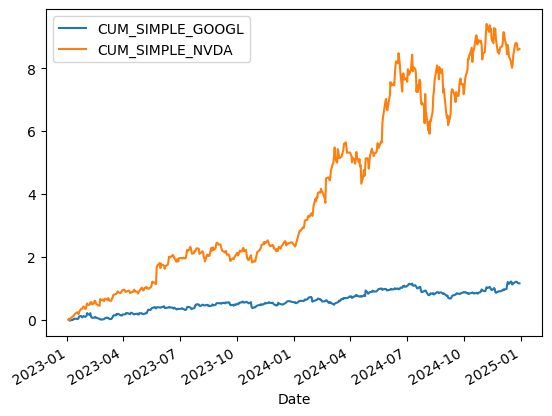

In [4]:
financial_data.plot(y=[f"CUM_SIMPLE_{stock}" for stock in stocks])

<Axes: ylabel='Frequency'>

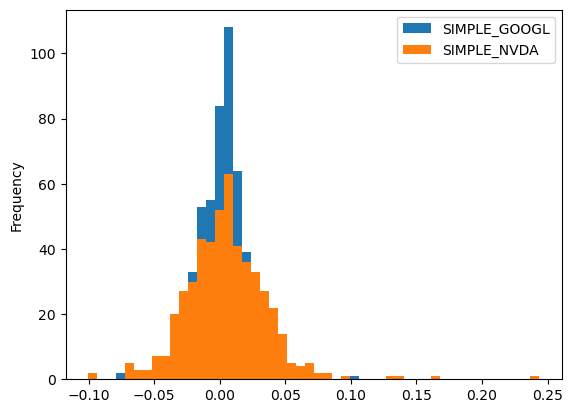

In [5]:
financial_data[[f"SIMPLE_{stock}" for stock in stocks]].plot(kind='hist',bins=50)

# Week 2 - Distributions + Cumulative Returns + Intro to Bonds

In [6]:
simple_data_nvda, x_vals_nvda, norm_vals_nvda = mbu.gaussian_overlay_data(financial_data,f"SIMPLE_{stocks[0]}")

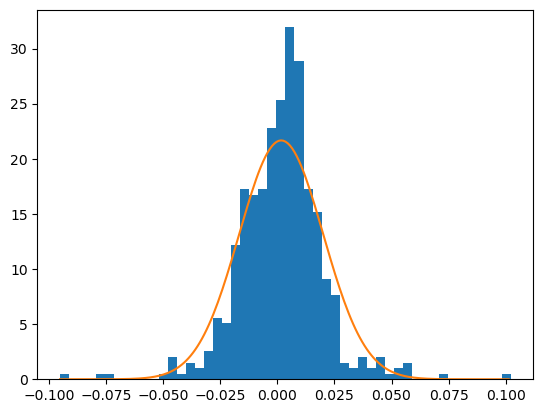

In [7]:
plt.hist(simple_data_nvda,bins=50,density=True)
plt.plot(x_vals_nvda,norm_vals_nvda)

In [8]:
daily_bond_data = mbu.get_bond_data(start_date,end_date,"DGS3MO")

In [9]:
mbu.static_sharpe_df(start_date,end_date,stocks)

c:\Users\Austen Couvertier\OneDrive\Desktop\Coding_Projects\phase_1_quant_foundations\market_behavior_utils.py:120: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_data = yf.download(ticker_list,start=start,end=end,group_by='ticker',keepna=True)
[*********************100%***********************]  2 of 2 completed


,static_sharpe
GOOGL,0.081588
NVDA,0.151698


# Week 3 - Regression, Volatility, Bond Valuation

In [10]:
window = "30D"
stocks = ['SPY','GOOGL','NVDA']
bond_type = 'DGS3MO'
full_financial_data = mbu.rolling_statistics(start_date,end_date,stocks,window)


c:\Users\Austen Couvertier\OneDrive\Desktop\Coding_Projects\phase_1_quant_foundations\market_behavior_utils.py:120: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_data = yf.download(ticker_list,start=start,end=end,group_by='ticker',keepna=True)
[*********************100%***********************]  3 of 3 completed


<Axes: xlabel='Date'>

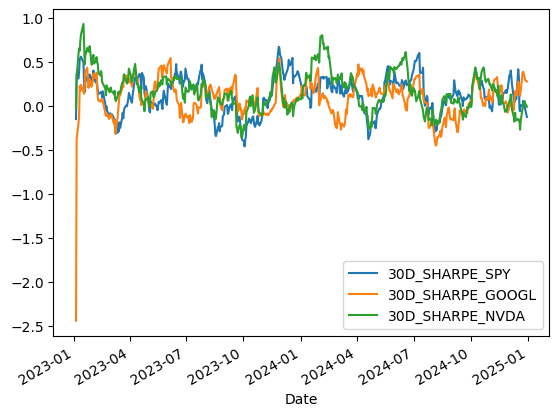

In [11]:
full_financial_data[[f"{window}_SHARPE_{stock}"for stock in stocks]].plot()

<Axes: xlabel='Date'>

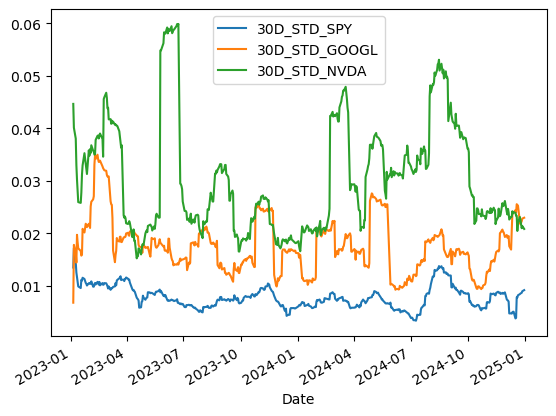

In [12]:
full_financial_data[[f"{window}_STD_{stock}"for stock in stocks]].plot()

In [13]:
full_financial_data[[f"{window}_EXCESS_RETURN_{stock}" for stock in stocks]].corr()

,30D_EXCESS_RETURN_SPY,30D_EXCESS_RETURN_GOOGL,30D_EXCESS_RETURN_NVDA
30D_EXCESS_RETURN_SPY,1.000000,0.238096,0.609195
30D_EXCESS_RETURN_GOOGL,0.238096,1.000000,0.255285
30D_EXCESS_RETURN_NVDA,0.609195,0.255285,1.000000


<Axes: xlabel='30D_EXCESS_RETURN_SPY', ylabel='30D_EXCESS_RETURN_NVDA'>

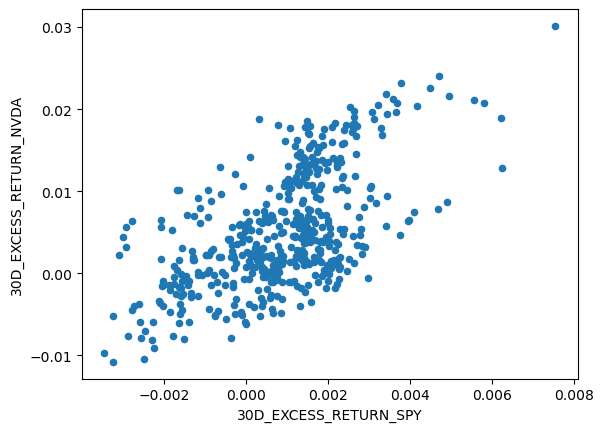

In [14]:
full_financial_data.plot(x=f'{window}_EXCESS_RETURN_{stocks[0]}',y=f'{window}_EXCESS_RETURN_{stocks[2]}',kind='scatter')

In [99]:
daily_market_excess = (full_financial_data[f"SIMPLE_{stocks[0]}"] - full_financial_data[f"{bond_type}"]).dropna()
daily_stock_excess = (full_financial_data[f"SIMPLE_{stocks[2]}"] - full_financial_data[f"{bond_type}"]).dropna()

fitted_line =  sc.linregress(daily_market_excess,daily_stock_excess)

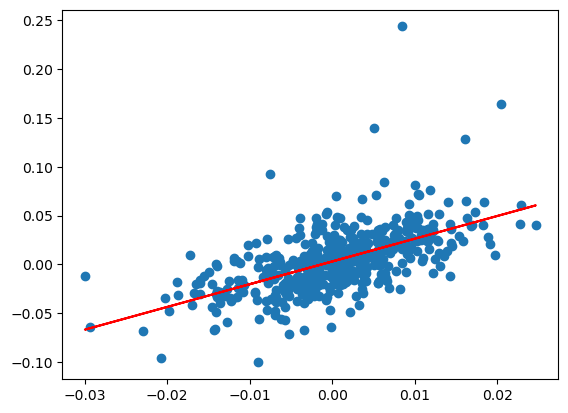

In [101]:
plt.scatter(daily_market_excess,daily_stock_excess)
plt.plot(daily_market_excess,fitted_line.intercept + fitted_line.slope * daily_market_excess,color='red')

In [123]:
face_value = 1000
coupon_value = 10
time_years = 5
coupons_per_year = 2
step = 150
rates = np.linspace(0.001,0.5,step)

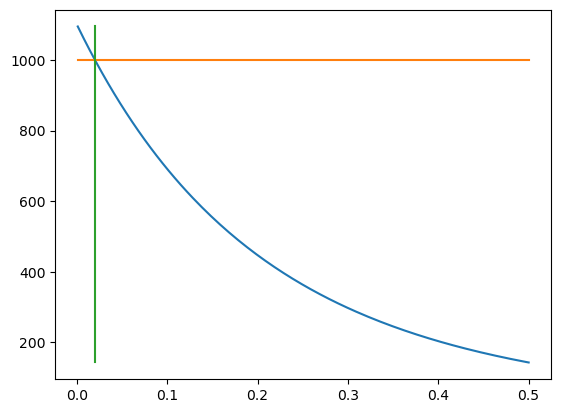

In [124]:
pvs_symbolic = present_value_fv(rates,face_value,coupon_value,time_years,coupons_per_year)

plt.plot(rates,pvs_symbolic)
plt.plot(rates,[face_value for _ in range(step)])
plt.plot([(coupons_per_year)*(coupon_value)/(face_value) for _ in range(step)],pvs_symbolic)

In [125]:
dur_symbolic = duration_fv(rates,face_value,coupon_value,time_years,coupons_per_year)
convex_symbolic = convexity_fv(rates,face_value,coupon_value,time_years,coupons_per_year)

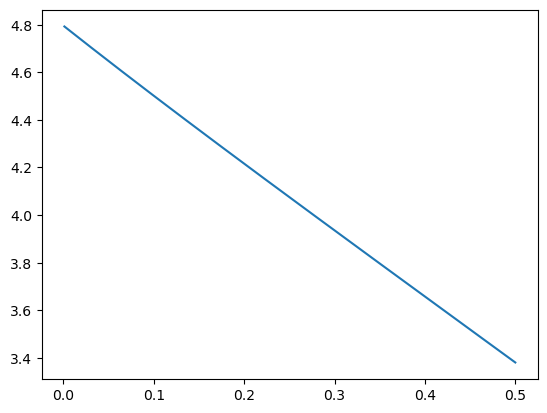

In [126]:
plt.plot(rates,dur_symbolic)

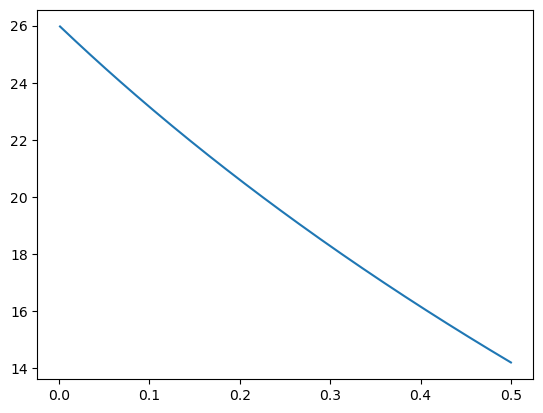

In [127]:
plt.plot(rates,convex_symbolic)

In [128]:
start = DT(2024,1,1)
end = DT(2024,12,31)
gdp_data_call  = pdr.fred.FredReader(['GDPC1','UNRATE','CPIAUCSL','FEDFUNDS','PCE','DGS3MO'],start,end)

In [129]:
gdp_data_call.read()

,GDPC1,UNRATE,CPIAUCSL,FEDFUNDS,PCE,DGS3MO
DATE,,,,,,
2024-01-01,23053.545,3.7,309.794,5.33,19308.5,NaN
2024-01-02,NaN,NaN,NaN,NaN,NaN,5.46
2024-01-03,NaN,NaN,NaN,NaN,NaN,5.48
2024-01-04,NaN,NaN,NaN,NaN,NaN,5.48
2024-01-05,NaN,NaN,NaN,NaN,NaN,5.47
...,...,...,...,...,...,...
2024-12-25,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-26,NaN,NaN,NaN,NaN,NaN,4.35
2024-12-27,NaN,NaN,NaN,NaN,NaN,4.31
